In [49]:
import pandas as pd
import matplotlib.pyplot as plt

Load data

In [50]:
df = pd.read_csv("all_data.csv")

Convert GDP into billions

In [51]:
df["GDP_in_billions"] = df["GDP"]/1000000000
df = df.drop(columns=["GDP"])
df.head()

,Country,Year,Life expectancy at birth (years),GDP_in_billions
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


Create dict of dataframes split by country

In [52]:
countries = {}
unique_countries = df["Country"].unique()
df["GDP_in_billions"] = df["GDP_in_billions"].round(2)
for country in unique_countries:
    country_df = df.loc[df["Country"] == country]
    countries[country] = country_df

Plot life expectancy vs GDP for each country

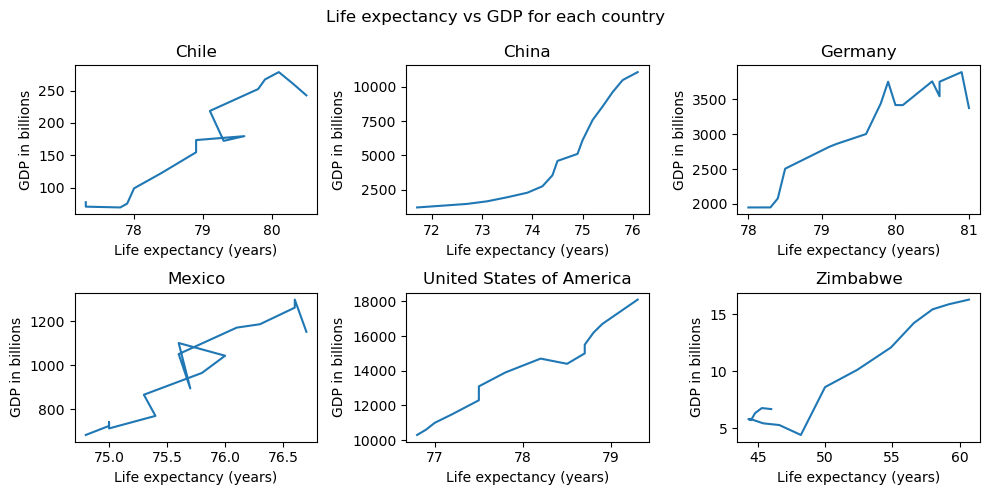

In [53]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
countries_keys = list(countries.keys())
for i, ax in enumerate(axs.flatten()):
    country = countries_keys[i]
    country_df = countries[country]
    ax.plot(country_df["Life expectancy at birth (years)"], country_df["GDP_in_billions"])
    ax.set_title(country)
    ax.set_xlabel("Life expectancy (years)")
    ax.set_ylabel("GDP in billions")
fig.suptitle("Life expectancy vs GDP for each country")
plt.tight_layout()
plt.show()